In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('Sales Data.csv')
df.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
#clean the data

# 1. Drop rows with missing values (NaN)
df = df.dropna(how='all')

# 2. Filter out "junk" rows where the column header was repeated in the data
df = df[df['Order Date'].str[0:2] != 'Or']

# 3. Convert columns to correct types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['Month'] = df['Order Date'].dt.month

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
print("Data Cleaned Successfully!")
df.head()

Data Cleaned Successfully!


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12


The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


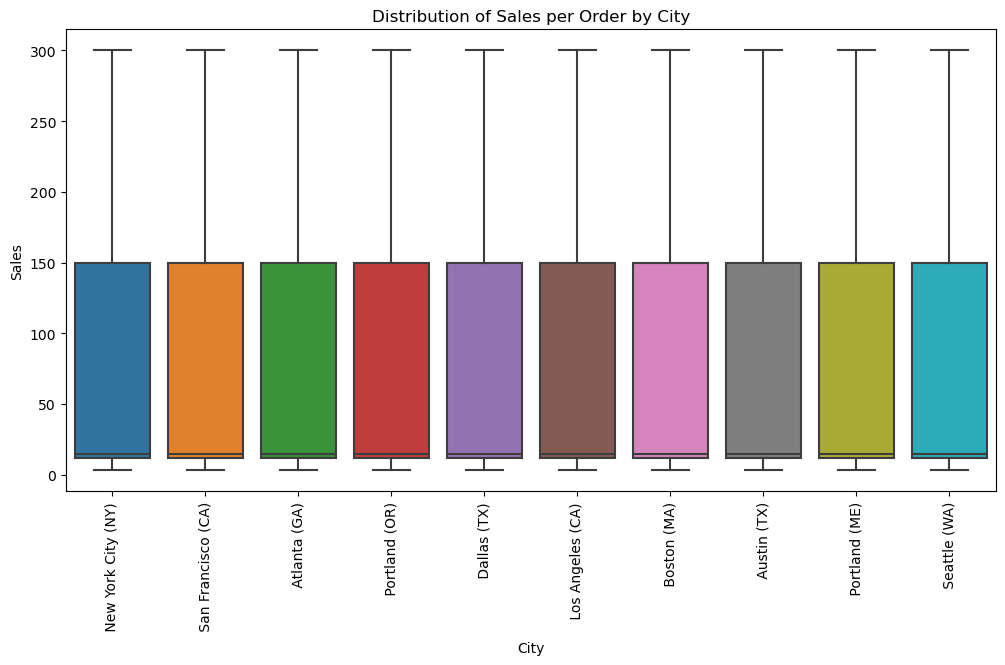

F-statistic : 0.43
P-value : 0.9183869957038648
CONCLUSION: FAIL TO REJECT the Null Hypothesis.
Average spending appears to be the same across cities.


In [9]:
# Visualization
plt.figure(figsize=(12,6))
sns.boxplot(x='City' , y= 'Sales' , data=df , showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution of Sales per Order by City')
plt.show()
# Statistcal test anova 
#Null Hypothesis :The average order value is the same across all cities.
#Alternative Hypothesis: At least one city has a significantly different average order value.
cities = df['City'].unique()
grouped_data = [df[df['City'] == city]['Sales'] for city in cities]

# run the anova
f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic : {f_stat:.2f}")
print(f"P-value : {p_value:}")

if p_value < 0.05:
    print("CONCLUSION: REJECT the Null Hypothesis.")
    print("There is a STATISTICALLY SIGNIFICANT difference in spending habits between cities.")
    print("This is a key finding for the marketing team: Location matters!")
else:
    print("CONCLUSION: FAIL TO REJECT the Null Hypothesis.")
    print("Average spending appears to be the same across cities.")

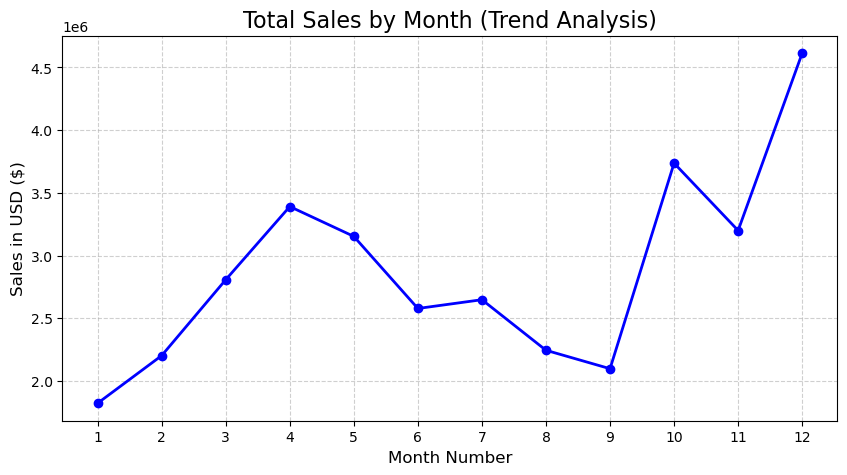

The best month for sales was Month #12 with $4,613,443.34 in revenue.


In [11]:
#best sale which month
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b', linewidth=2)
#Add labels and style
plt.title('Total Sales by Month (Trend Analysis)', fontsize=16)
plt.xlabel('Month Number', fontsize=12)
plt.ylabel('Sales in USD ($)', fontsize=12)
plt.xticks(range(1, 13)) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
#--------------------
best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()
print(f"The best month for sales was Month #{best_month} with ${best_month_sales:,.2f} in revenue.")

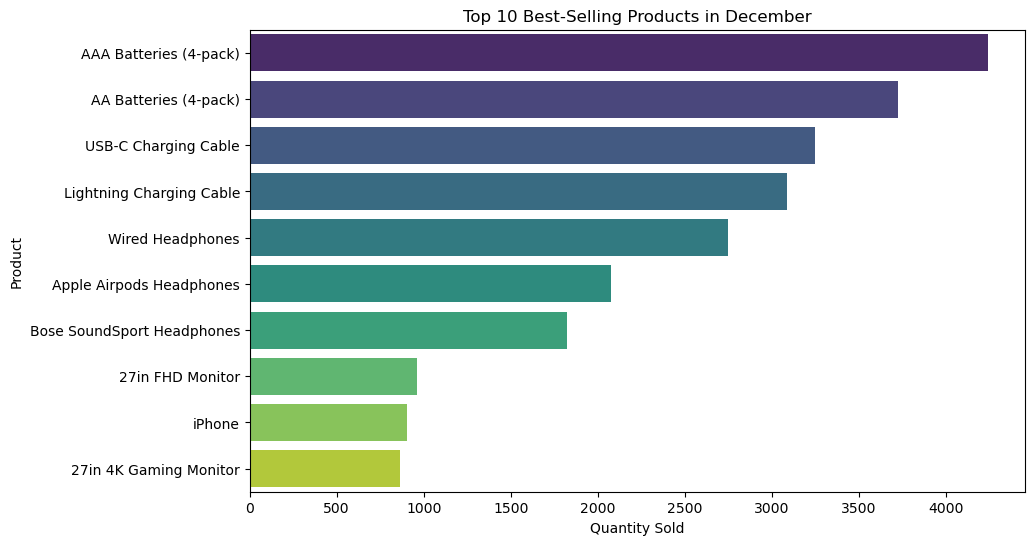

In [12]:
#what product was boosting the sales 
december_data = df[df['Month'] == 12]
product_group = december_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_group.values, y=product_group.index, palette='viridis')

plt.title('Top 10 Best-Selling Products in December')
plt.xlabel('Quantity Sold')
plt.show()